In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras.applications import VGG16, Xception
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data_dir='/content/drive/My Drive/Colab Notebooks/seppepeeters/car_classification/'
train_dir = 'train'
validation_dir = 'test'

In [3]:
def draw_training_info(_history):
    
    acc = _history.history['acc']
    val_acc = _history.history['val_acc']
    loss = _history.history['loss']
    val_loss = _history.history['val_loss']

    epochs_plot = range(1, len(acc) + 1)
    plt.plot(epochs_plot, acc, 'bo', label='Training acc')
    plt.plot(epochs_plot, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs_plot, loss, 'bo', label='Training loss')
    plt.plot(epochs_plot, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    return

In [4]:
def print_model_info(_conv_base, _model):
    
    print('CONV_BASE.SUMMARY:')
    _conv_base.summary()

    print('CONV_BASE LAYERS INFO:')
    for layer in _conv_base.layers:
        print(layer, layer.trainable)

    print('MODEL.SUMMARY:')
    _model.summary()
    return

In [5]:
def get_xception_fine_tune_model(_input_shape, _num_classes):
    
    _conv_base = Xception(weights='imagenet', include_top=False, input_shape=_input_shape)
    _conv_base.trainable = True

    for _i, _layer in enumerate(_conv_base.layers):
        if _i < 115:
            _layer.trainable = False
        else:
            _layer.trainable = True

    _model = models.Sequential()
    _model.add(_conv_base)

    _model.add(layers.GlobalAveragePooling2D())
    _model.add(layers.Dense(_num_classes, activation='softmax'))

    print_model_info(_conv_base, _model)
    return _model

In [6]:
input_shape = (256, 256, 3)
target_size = (256, 256)
batch_size = 256
lr = 0.0001
epochs = 20

In [7]:
train_datagen = ImageDataGenerator(  # Расширяем тренировочные данные.
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8144 images belonging to 196 classes.


In [9]:
num_classes = train_generator.num_classes

In [10]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8041 images belonging to 196 classes.


In [12]:
model = get_xception_fine_tune_model(input_shape, num_classes)

CONV_BASE.SUMMARY:
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
________________________________________________________________________

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=lr),
              metrics=['accuracy'])

In [14]:
train_steps = len(train_generator.filenames) // batch_size
validation_steps = len(validation_generator.filenames) // batch_size
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/20
31/31 [==============================] - 3048s 98s/step - loss: 5.2317 - accuracy: 0.0143 - val_loss: 5.0914 - val_accuracy: 0.0289
Epoch 2/20
31/31 [==============================] - 2998s 97s/step - loss: 4.9829 - accuracy: 0.0562 - val_loss: 4.7810 - val_accuracy: 0.0545
Epoch 3/20
31/31 [==============================] - 3005s 97s/step - loss: 4.6814 - accuracy: 0.1073 - val_loss: 4.3185 - val_accuracy: 0.0989
Epoch 4/20
31/31 [==============================] - 2999s 97s/step - loss: 4.3786 - accuracy: 0.1738 - val_loss: 4.0356 - val_accuracy: 0.1318
Epoch 5/20
31/31 [==============================] - 3024s 98s/step - loss: 4.0882 - accuracy: 0.2292 - val_loss: 3.7329 - val_accuracy: 0.1498
Epoch 6/20
31/31 [==============================] - 3020s 97s/step - loss: 3.8185 - accuracy: 0.2819 - val_loss: 3.6067 - val_accuracy: 0.1737
Epoch 7/20
31/31 [==============================] - 2996s 97s/step - loss: 3.5572 - accuracy: 0.3380 - val_loss: 3.4638 - val_accuracy: 0.1991

In [16]:
model.save('fine_tune_xception.h5')

In [3]:
validation_score = model.evaluate_generator(validation_generator, steps=validation_steps)
print('Validation loss: ', validation_score[0])
print('Validation acc:  ', validation_score[1])

NameError: name 'model' is not defined

NameError: name 'np' is not defined

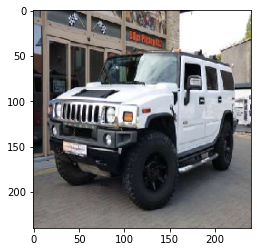

In [22]:
import keras
from keras.preprocessing import image

IMG_SIZE = 240
loaded_model = keras.models.load_model("fine_tune_xception.h5")
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

image_path= "hummer.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict(img)
plt.title(result[0][0])
plt.show()